In [6]:
library(Seurat)
library(ggplot2)
library(mltools)
library(data.table)
library(lsa)
library(aricode)
library(mclust)
library(kBET)
library(cowplot)
options(repr.plot.width=14, repr.plot.height=10)
library(viridis)
library("hrbrthemes")
setwd('/gpfs/ysm/pi/zhao-data/wd262/new_cytof/CyTOF_classification')
source('preparation.R')

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



In [2]:
seur_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern='*seur*', full=T, ignore.case = TRUE)
rst_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern='*rst*', full=T, ignore.case = TRUE)
BCR_XL_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern=glob2rx('*BCR-XL.rds'), full=T, ignore.case = TRUE)
Reference_files <- list.files(path = '/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype', pattern=glob2rx('*Reference.rds'), full=T, ignore.case = TRUE)
rst_BCR_files <- intersect(rst_files,BCR_XL_files)
rst_Reference_files <- intersect(rst_files,Reference_files)
seur_BCR_files <- intersect(seur_files,BCR_XL_files)
seur_Reference_files <- intersect(seur_files,Reference_files)

In [3]:
acc_raw <- c()



sample.idx=3
rst <- readRDS(rst_BCR_files[sample.idx])
seur <- readRDS(seur_BCR_files[sample.idx])
truth <- seur$label

# raw accuracy
cnt_max = 0
N = ncol(seur)
for(i in 1:length(seur$label)){
    cnt_max = cnt_max + 1*(seur$label[i]==seur$pred[i])
}  
cnt_max
print(cnt_max/N)

[1] 9231

[1] 0.7997747


In [4]:
celltype_pred <- seur$pred
H_est_subsetting <- data.frame(rst$H[,-1])
H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))

In [8]:
df

cutoff,ari,N,acc
<dbl>,<dbl>,<dbl>,<dbl>
0.01,0.6039097,11542,0.7997747
0.02,0.6039097,11542,0.7997747
0.03,0.6039097,11542,0.7997747
0.04,0.6039097,11542,0.7997747
0.05,0.6039097,11542,0.7997747
0.06,0.6039097,11542,0.7997747
0.07,0.6039097,11542,0.7997747
0.08,0.6039097,11542,0.7997747
0.09,0.6039097,11542,0.7997747


In [7]:
cutoff.list <- c(1:100)/100                          
df <- data.frame(cutoff = cutoff.list)
df$acc <- df$N <- df$ari<- 0   
df$cutoff <- cutoff.list                    
                          
for(j in c(1:length(cutoff.list))){
    ## cnt_max
    cnt_max = 0
    N_subsetting = 0
    idx.subsetting = 0
        for(i in 1:length(truth)){
            if(max(H_est_subsetting[,i])>cutoff.list[j]){
                idx.subsetting = c(idx.subsetting,i)
                N_subsetting = N_subsetting+1
                cnt_max = cnt_max + 1*(truth[i]==celltype_pred[i])
            }

        }
    if(N_subsetting == 0) {
        df$acc[j] <- 0
    } else {
       df$acc[j]<-cnt_max/N_subsetting
    } 
    df$N[j] <- N_subsetting
    
    truth_sub <- truth[idx.subsetting]
    truth_fact_sub <- as.factor(truth_sub)
    truth_fact_sub <- factor(truth_fact_sub, levels = as.character(1:nrow(H_est_subsetting)))

    
    celltype_pred_sub <- seur$pred[idx.subsetting]
    celltype_pred_fact_sub <- as.factor(celltype_pred_sub)
    celltype_pred_fact_sub <- factor(celltype_pred_fact_sub, levels = as.character(1:nrow(H_est_subsetting)))

    ## ARI
    ari <- adjustedRandIndex(celltype_pred_sub, truth_sub)
    df$ari[j] <- ari
    

}

Warning message in melt(df[, -3], id.vars = "cutoff", variable.name = "Metrics"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df[, -3]). In the next version, this warning will become an error.”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


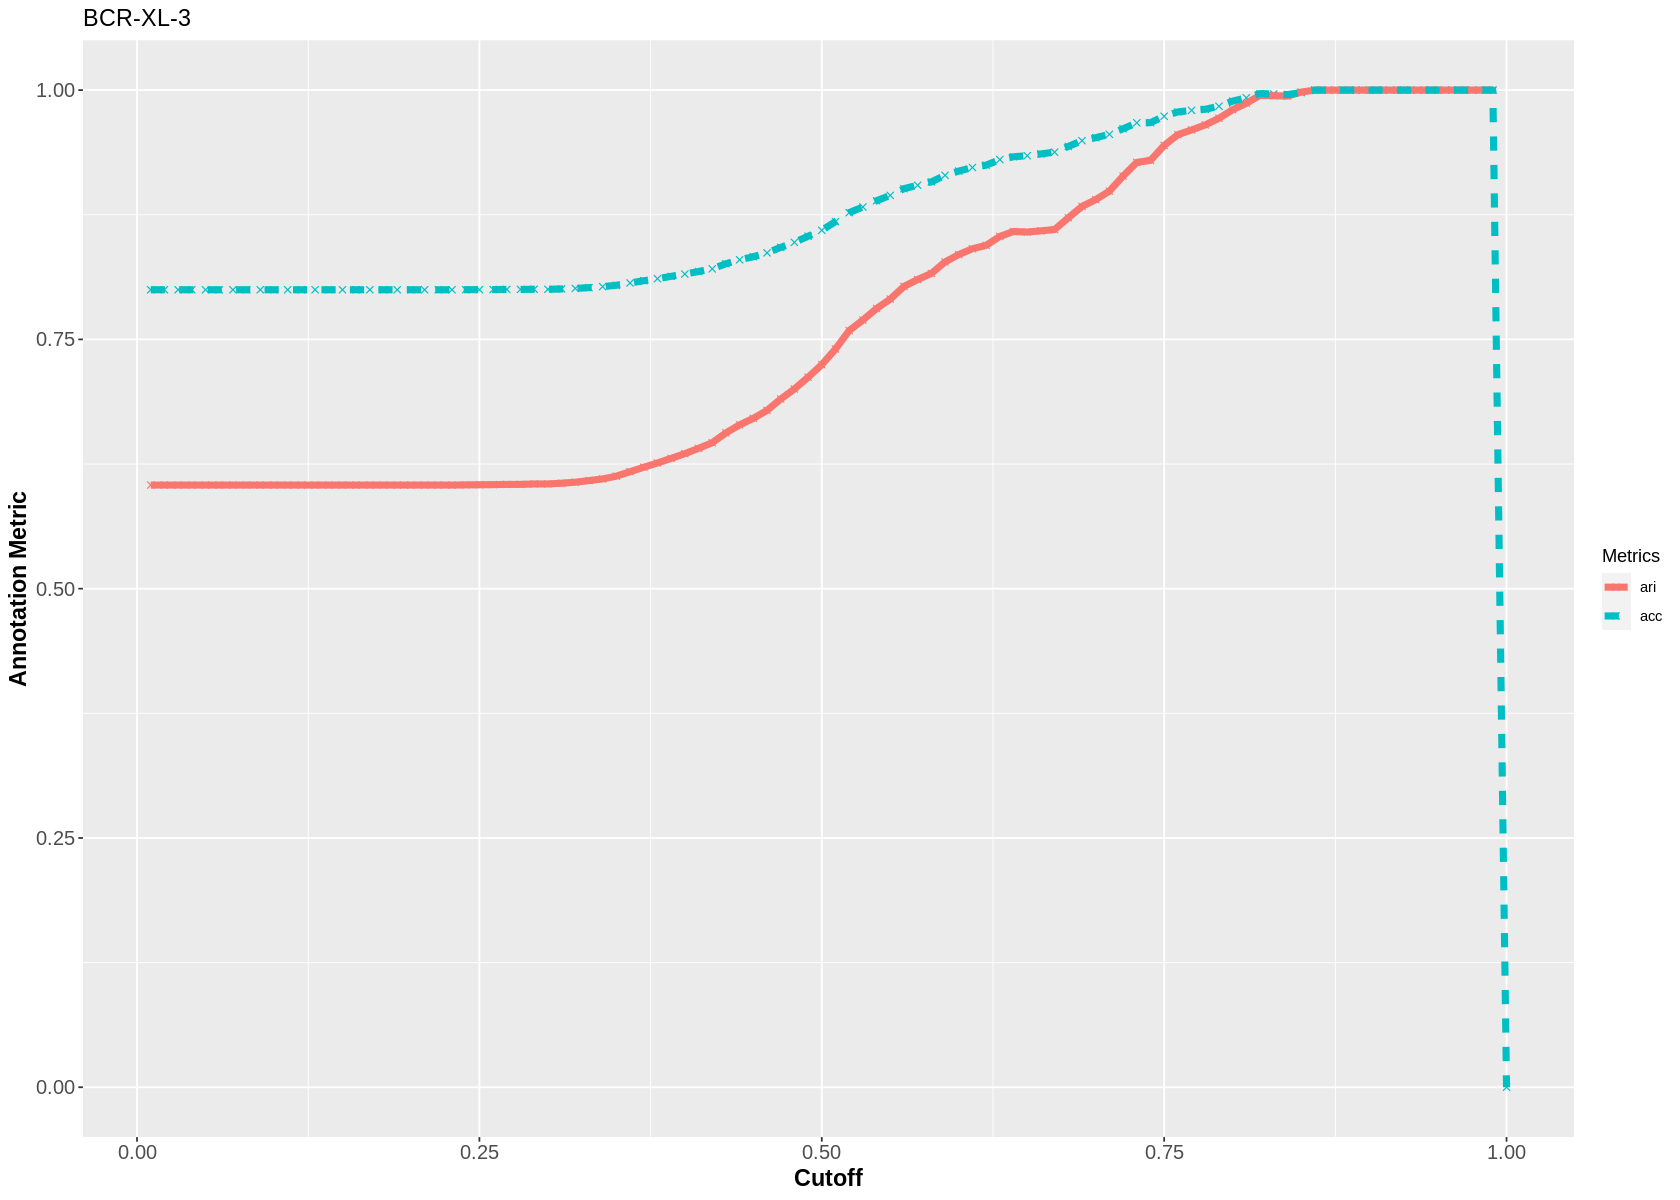

In [119]:
subset_6 <- melt(df[,-3], id.vars = 'cutoff', variable.name = 'Metrics')
# write.table(subset_6, '/Users/mac/Desktop/Yale/Hongyu/CyTOF/subset_6.txt')
# subset_1 <- read.table('/Users/mac/Desktop/Yale/Hongyu/CyTOF/subset_1.txt')
ggplot(subset_6, aes(cutoff,value)) + 
geom_point(aes(colour = Metrics), shape = 4) +
labs(y = 'Annotation Metric', x = 'Cutoff', title = paste0('BCR-XL-',sample.idx)) + 
geom_line(aes(color = Metrics, linetype = Metrics), size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

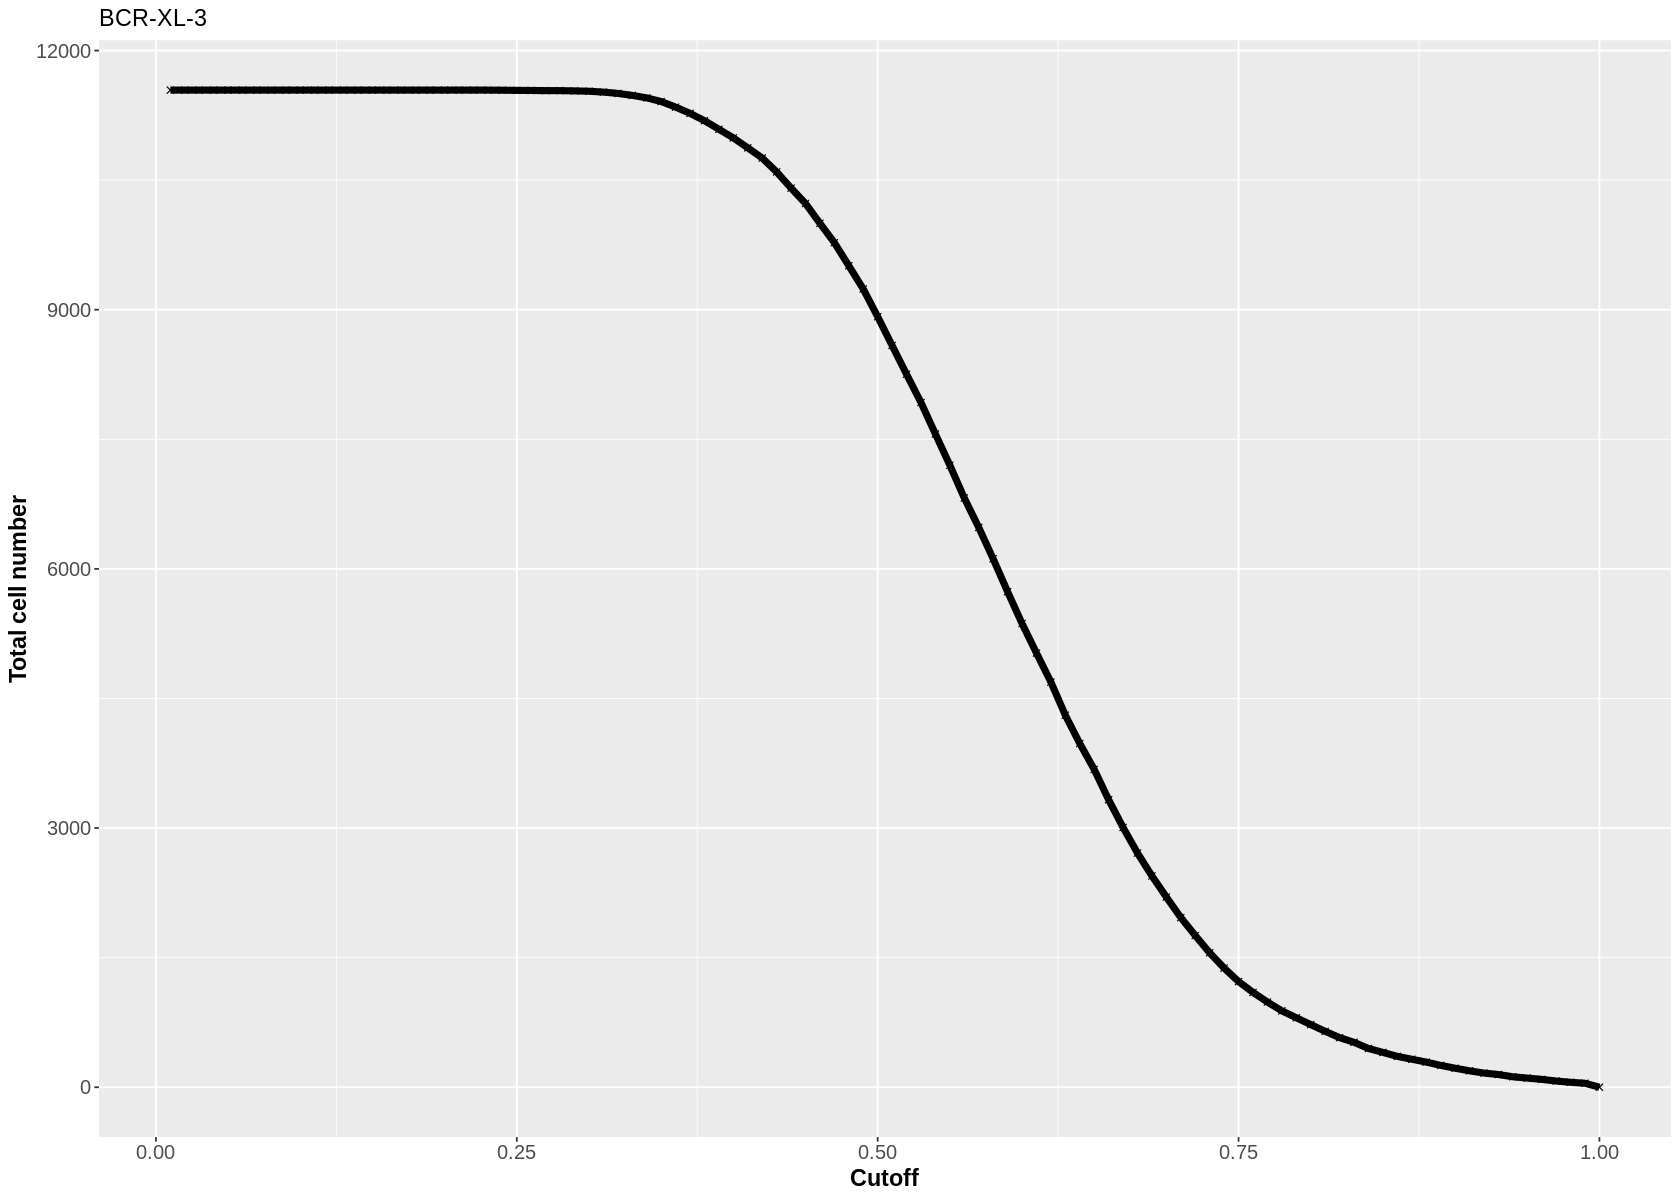

In [120]:
ggplot(df, aes(cutoff,N)) + 
geom_point(shape = 4) +
labs(y = 'Total cell number', x = 'Cutoff', title = paste0('BCR-XL-',sample.idx)) + 
geom_line(size=2) +
# ylim(0.8, 1) +
theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size=14))

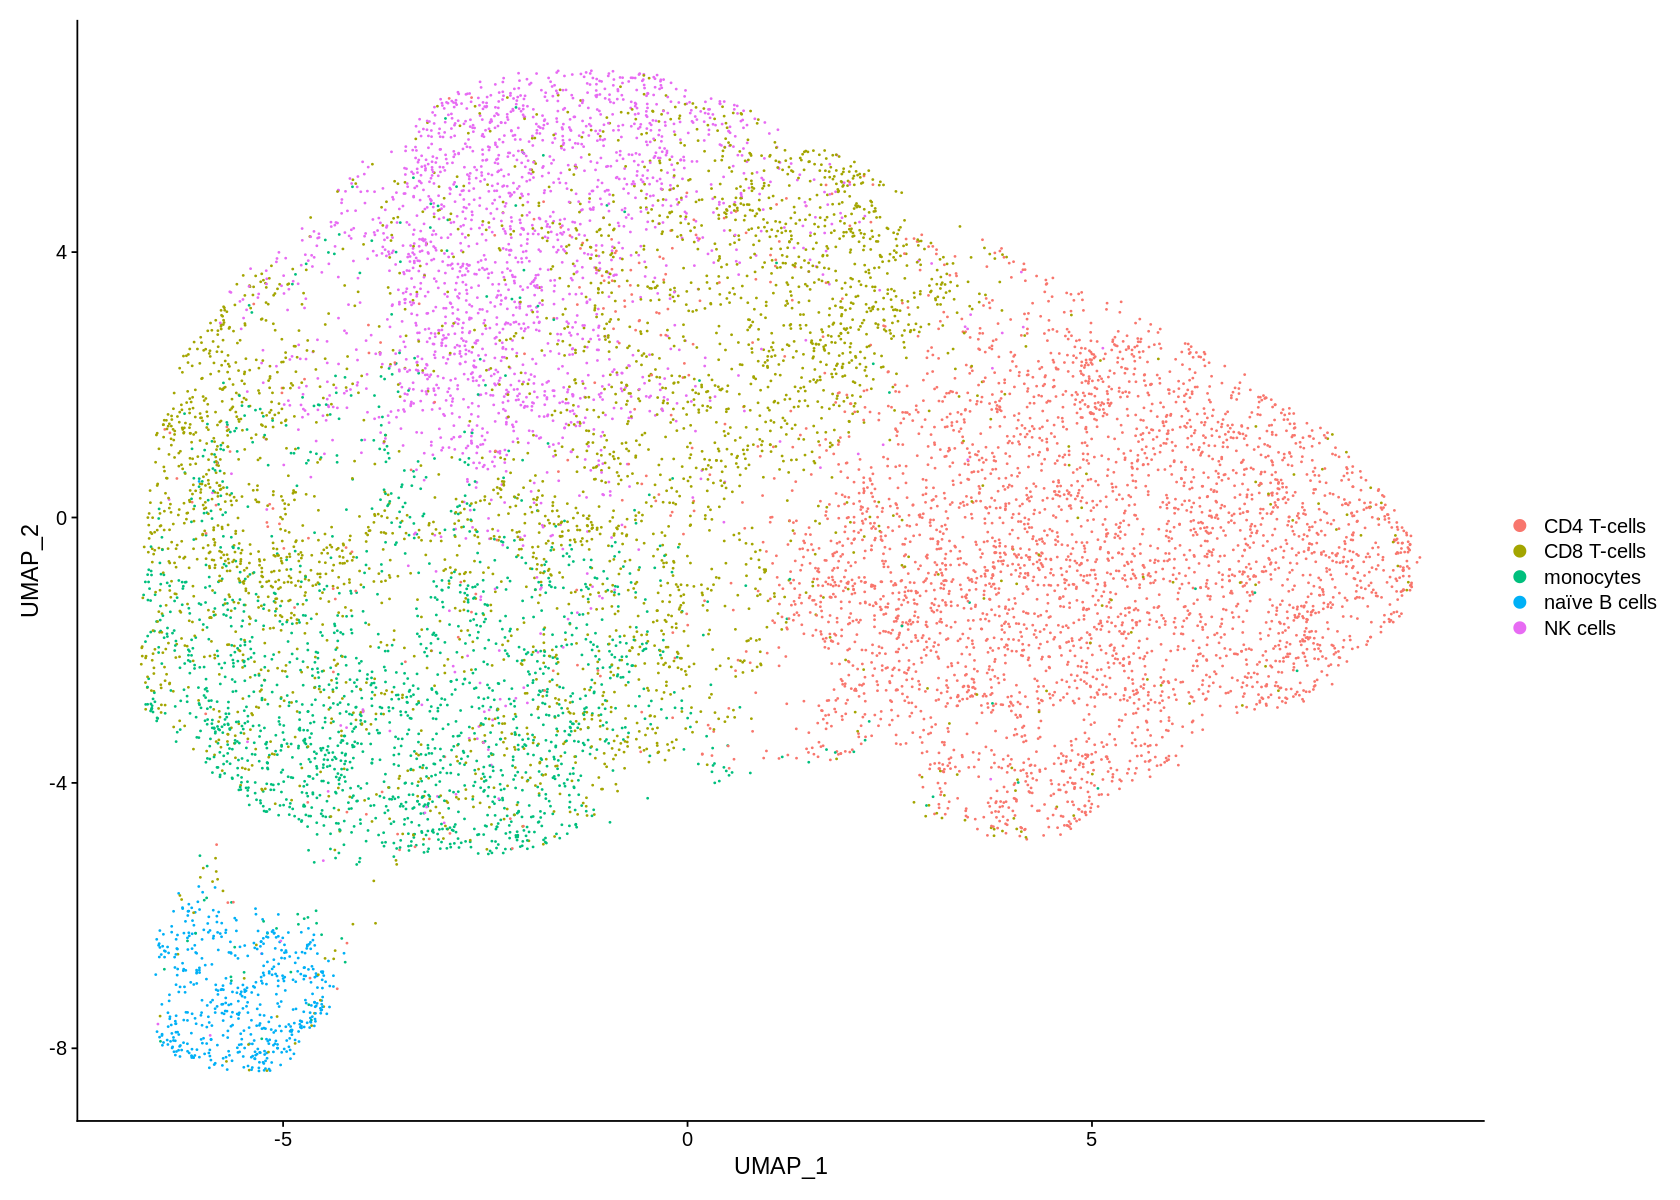

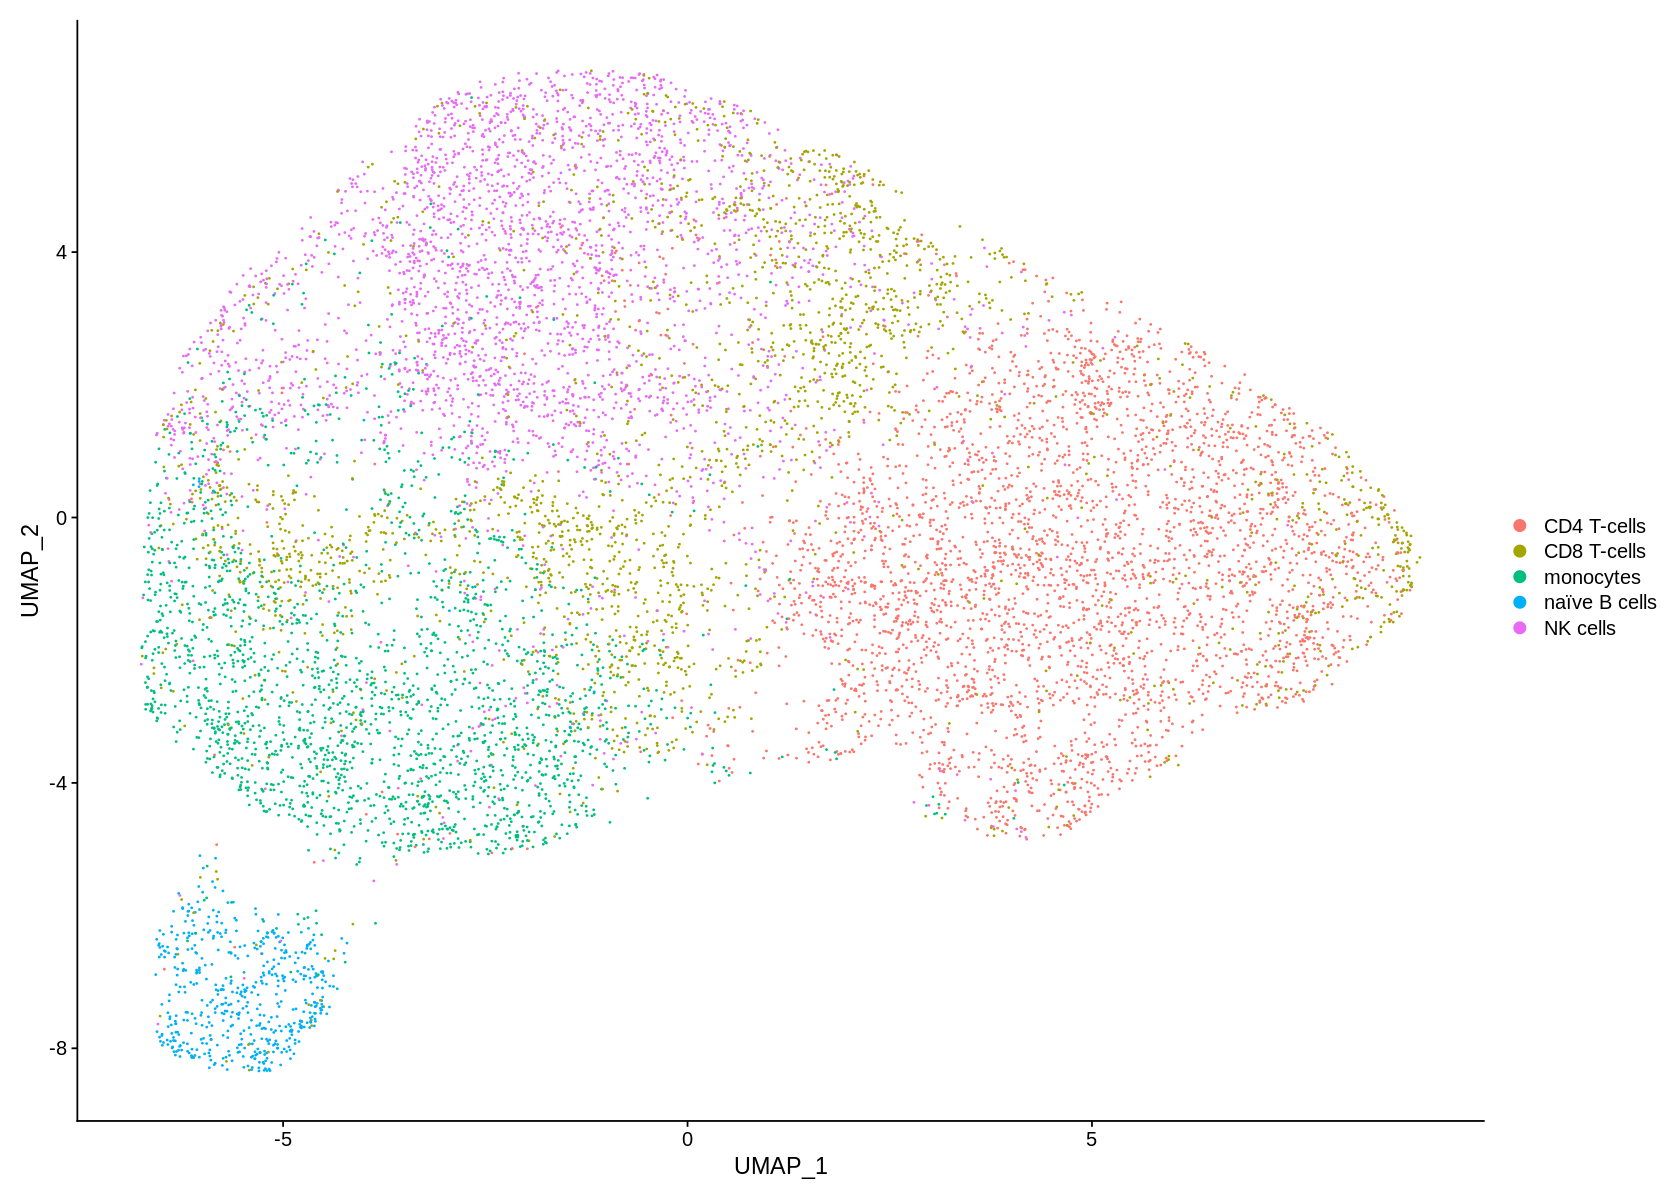

In [121]:
DimPlot(seur,group.by='label')
DimPlot(seur,group.by='pred')

In [113]:
## subsetting
H_est_subsetting <- rst$H[,-1]
H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))

cnt_max = 0
N_subsetting = 0
idx.subsetting = c()
for(i in 1:length(seur$label)){
    if(max(H_est_subsetting[,i])>0.75){
        idx.subsetting = append(idx.subsetting,i)
        N_subsetting = N_subsetting+1
        cnt_max = cnt_max + 1*(seur$label[i]==seur$pred[i])
    }
    
}  
cnt_max
print(cnt_max/N_subsetting)

[1] 3732

[1] 0.9267445


In [114]:
seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])

In [129]:
table(seur_sub$pred)
table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')]


  CD4 T-cells   CD8 T-cells     monocytes naïve B cells      NK cells 
         1948           958           403            83           635 


  CD4 T-cells   CD8 T-cells     monocytes naïve B cells      NK cells 
         1948           958           403            83           635 

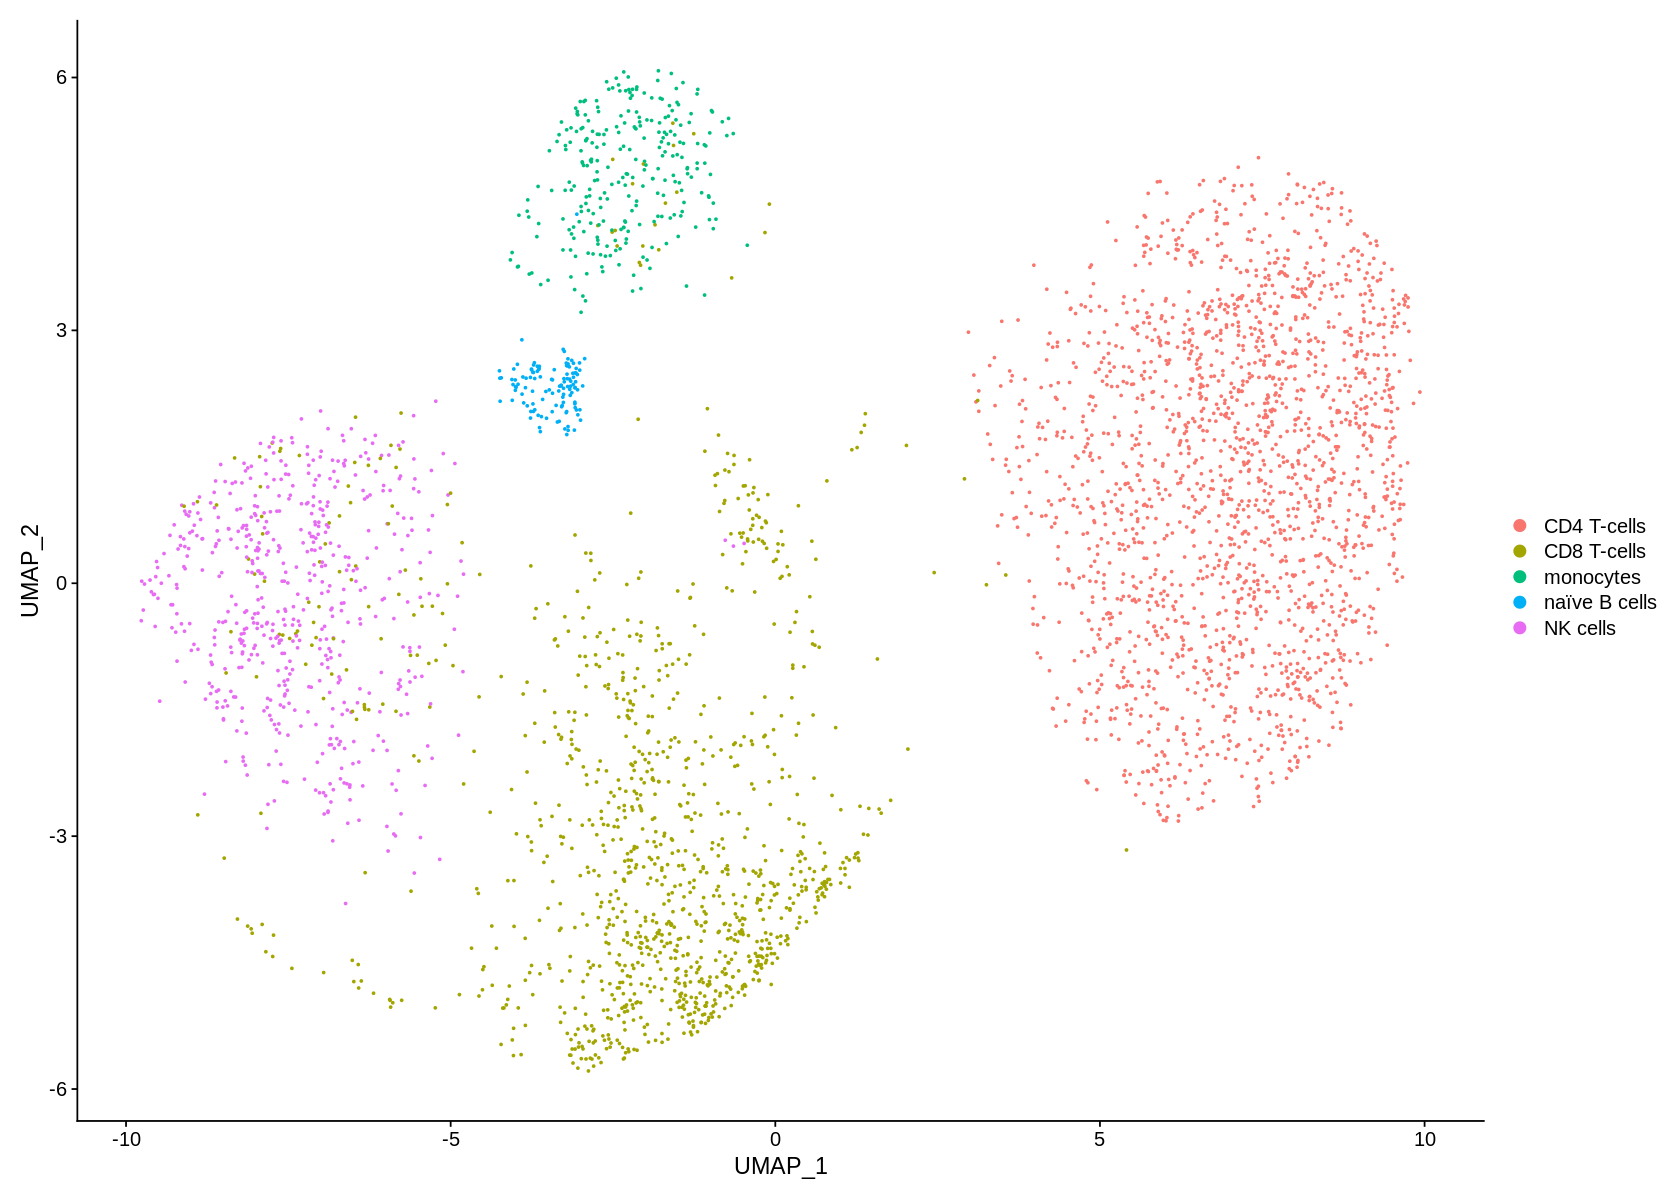

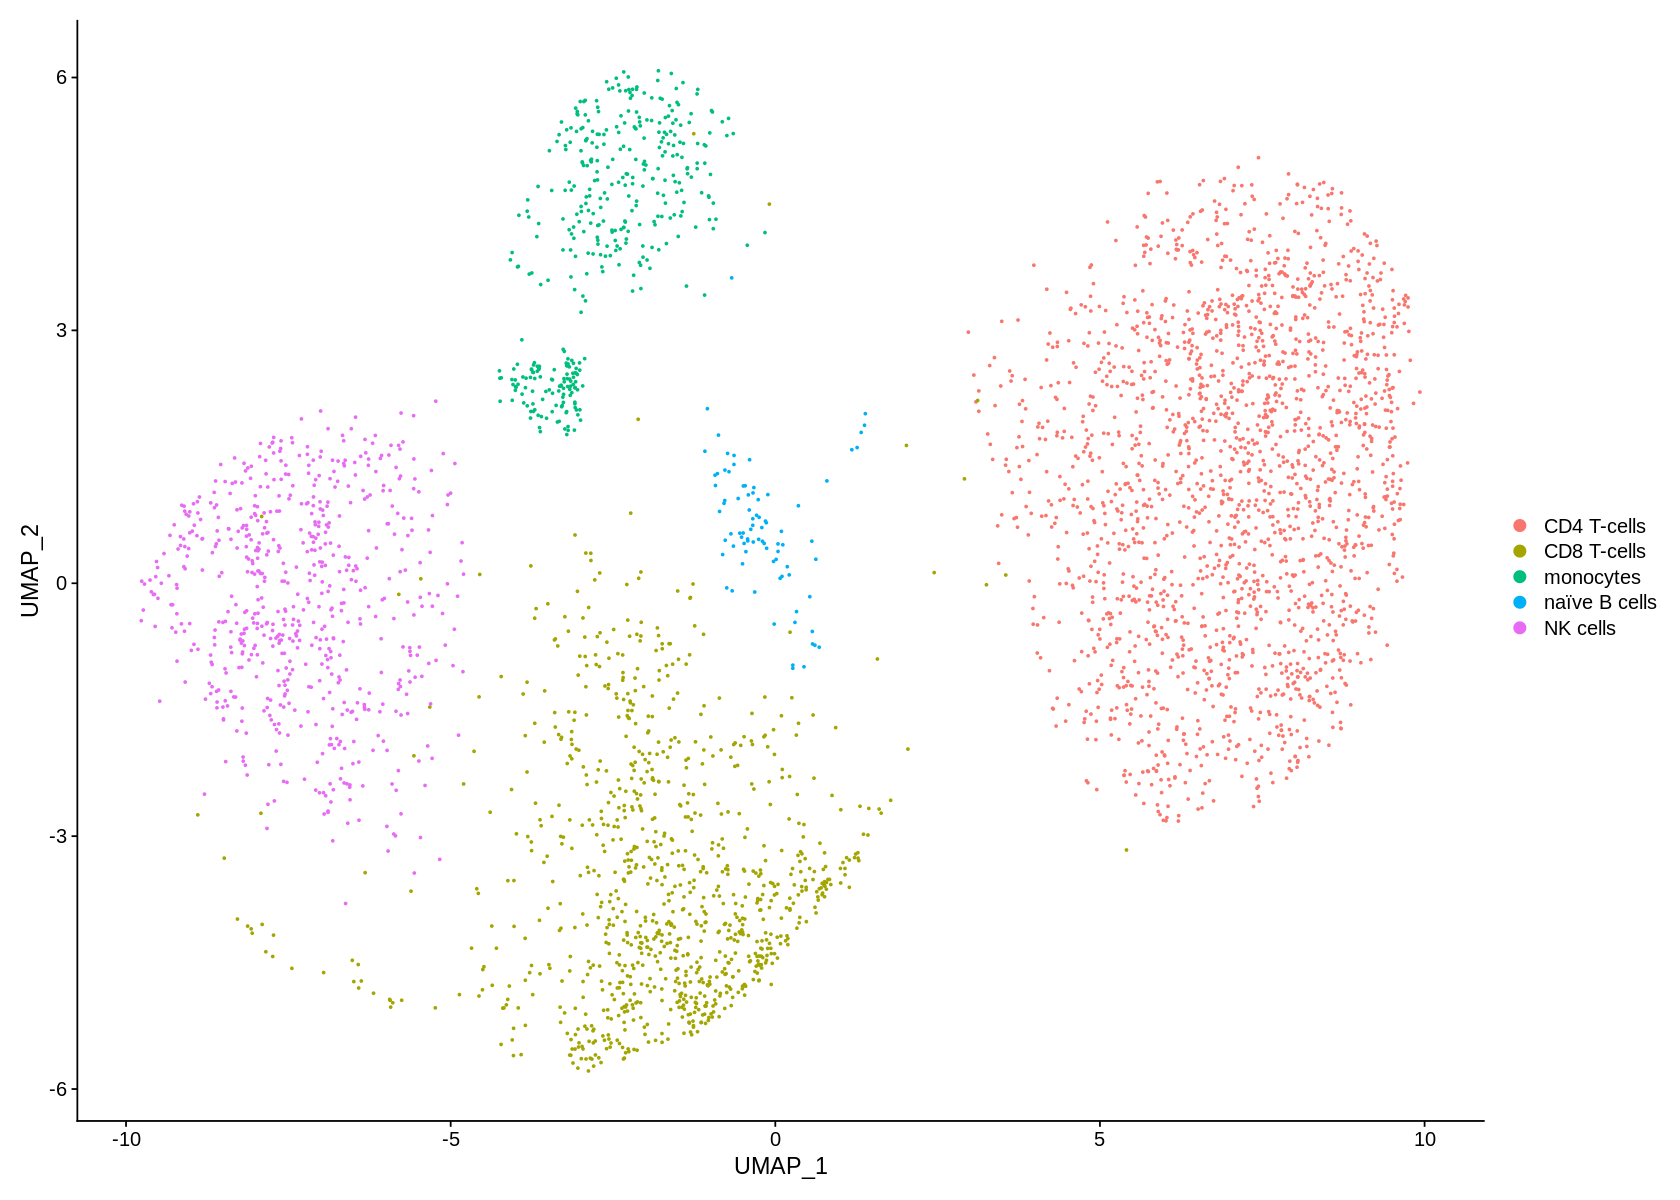

In [115]:
DimPlot(seur_sub,group.by='label')
DimPlot(seur_sub,group.by='pred')

In [174]:
# BCR
ct_cnt_pred <- data.frame(matrix(0,5,nrow=1,ncol=5))
ct_cnt_label <- data.frame(matrix(0,5,nrow=1,ncol=5))
colnames(ct_cnt_pred) <- colnames(ct_cnt_label) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')
acc_raw <- c()
acc_subsetting <- c()

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_BCR_files[sample.idx])
    seur <- readRDS(seur_BCR_files[sample.idx])
    truth <- seur$label

    # raw accuracy
    cnt_max = 0
    N = ncol(seur)
    for(i in 1:length(seur$label)){
        cnt_max = cnt_max + 1*(seur$label[i]==seur$pred[i])
    }  
    print(paste0(rst_BCR_files[sample.idx]," : ", cnt_max))
    print(cnt_max/N)
    acc_raw <- append(acc_raw,cnt_max/N) 
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))

    cnt_max = 0
    N_subsetting = 0
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
            N_subsetting = N_subsetting+1
            cnt_max = cnt_max + 1*(seur$label[i]==seur$pred[i])
        }

    }  
    cnt_max
    print(cnt_max/N_subsetting)
    acc_subsetting <- append(acc_subsetting,cnt_max/N_subsetting)                          
                              
    # cell type proportions
    seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_cnt_pred <- rbind(ct_cnt_pred,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')])
    ct_cnt_label <- rbind(ct_cnt_label,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')])                          
                              
}

[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient1_BCR-XL.rds : 2429"
[1] 0.8829517
[1] 0.9161966
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient2_BCR-XL.rds : 13373"
[1] 0.8340922
[1] 0.8744709
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient3_BCR-XL.rds : 9231"
[1] 0.7997747
[1] 0.8594013
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient4_BCR-XL.rds : 7084"
[1] 0.8253524
[1] 0.8804302
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient5_BCR-XL.rds : 6303"
[1] 0.7818159
[1] 0.8408278
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient6_BCR-XL.rds : 6767"
[1] 0.8286799
[1] 0.8743968
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient7_BCR-XL.rds : 10094"
[1] 0.7200228
[1] 0.767624
[1] "/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/5celltype/rst_patient8_BCR-XL.rds : 1714"
[1] 0.1554226
[1] 0.1155387


In [175]:
ct_cnt_pred <- ct_cnt_pred[-1,]
ct_cnt_label <- ct_cnt_label[-1,]

In [179]:
saveRDS(ct_prop_pred,"/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/ct_prop_pred_BCR.rds")
saveRDS(ct_prop_label,"/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/ct_prop_label_BCR.rds")

In [200]:
ct_prop_pred <- apply(ct_cnt_pred,1,function(x) x/sum(x))
ct_prop_label <- apply(ct_cnt_label,1,function(x) x/sum(x))
                       
ct_prop_pred <- ct_prop_pred[,-8]
ct_prop_label <- ct_prop_label[,-8]  
                       
ct_prop_pred <- data.frame(ct_prop_pred)
ct_prop_label <- data.frame(ct_prop_label)   
                       
ct_prop_pred$celltype <- rownames(ct_prop_pred)
ct_prop_pred_long <-  melt(ct_prop_pred, id.vars = 'celltype', variable.name = 'patient.ID')
                       
ct_prop_label$celltype <- rownames(ct_prop_label)
ct_prop_label_long <-  melt(ct_prop_label, id.vars = 'celltype', variable.name = 'patient.ID')   
                       
ct_prop_pred_long$group = "prediction-BCR"
ct_prop_label_long$group = "true-BCR"
ct_prop_long <- rbind(ct_prop_pred_long,ct_prop_label_long)                       

Warning message in melt(ct_prop_pred, id.vars = "celltype", variable.name = "patient.ID"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(ct_prop_pred). In the next version, this warning will become an error.”
Warning message in melt(ct_prop_label, id.vars = "celltype", variable.name = "patient.ID"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(ct_prop_label). In the next v

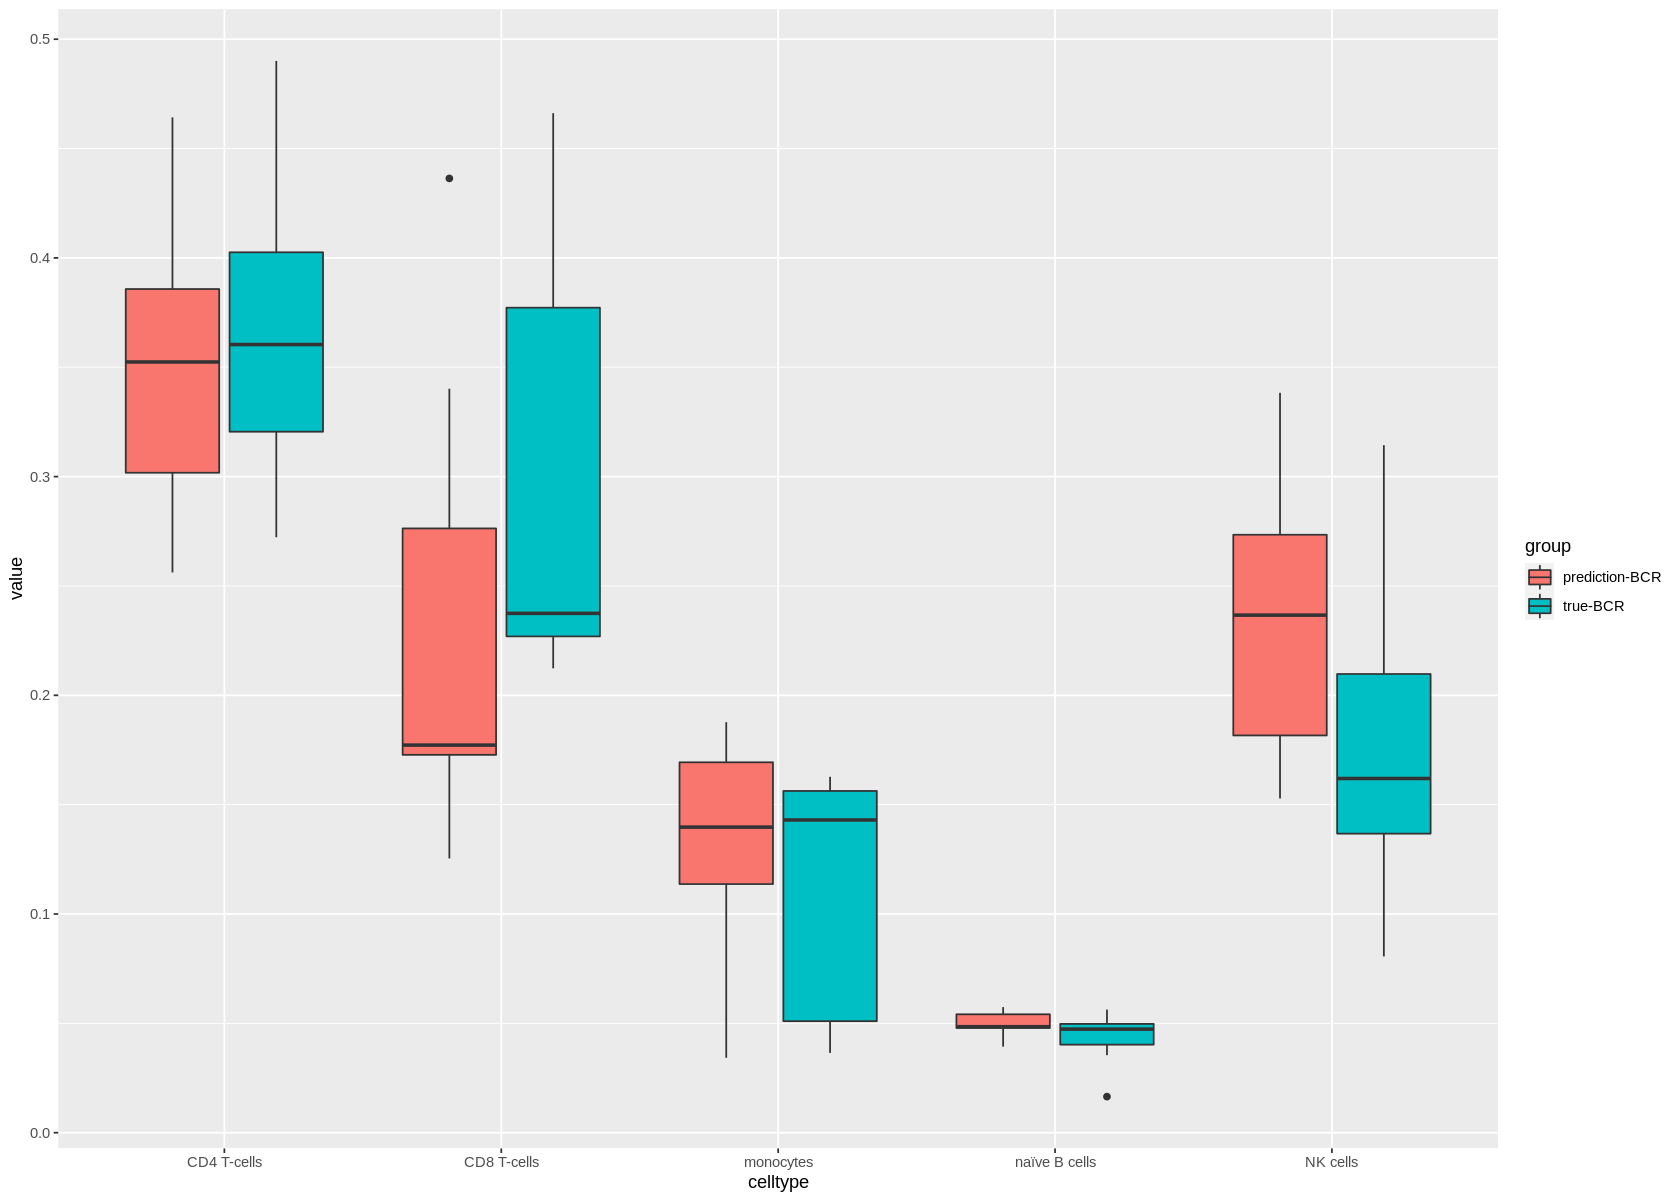

In [201]:
ggplot(ct_prop_long, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()

In [ ]:
# Reference
ct_prop_pred <- data.frame(matrix(0,5,nrow=1,ncol=5))
ct_prop_label <- data.frame(matrix(0,5,nrow=1,ncol=5))
colnames(ct_prop_pred) <- colnames(ct_prop_label) <- c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')
acc_raw <- c()
acc_subsetting <- c()

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_Reference_files[sample.idx])
    seur <- readRDS(seur_Reference_files[sample.idx])
    truth <- seur$label

    # raw accuracy
    cnt_max = 0
    N = ncol(seur)
    for(i in 1:length(seur$label)){
        cnt_max = cnt_max + 1*(seur$label[i]==seur$pred[i])
    }  
    print(paste0(rst_BCR_files[sample.idx]," : ", cnt_max))
    print(cnt_max/N)
    acc_raw <- append(acc_raw,cnt_max/N) 
    
    ## subsetting
    H_est_subsetting <- rst$H[,-1]
    H_est_subsetting <- apply(H_est_subsetting,2,function(x) x/sum(x))

    cnt_max = 0
    N_subsetting = 0
    idx.subsetting = c()
    for(i in 1:length(seur$label)){
        if(max(H_est_subsetting[,i])>0.5){
            idx.subsetting = append(idx.subsetting,i)
            N_subsetting = N_subsetting+1
            cnt_max = cnt_max + 1*(seur$label[i]==seur$pred[i])
        }

    }  
    print(cnt_max)
    print(cnt_max/N_subsetting)
    acc_subsetting <- append(acc_subsetting,cnt_max/N_subsetting)                          
                              
    # cell type proportions
    seur_sub <- subset(seur, cells=Cells(seur)[idx.subsetting])
    ct_prop_pred <- rbind(ct_prop_pred,table(seur_sub$pred)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')])
    ct_prop_label <- rbind(ct_prop_label,table(seur_sub$label)[c('CD4 T-cells','CD8 T-cells','monocytes', 'naïve B cells','NK cells')])                          
                              
}

In [ ]:
saveRDS(ct_prop_label,"/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/ct_prop_label_ref.rds")
saveRDS(acc,"/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/acc_ref.rds")

In [199]:
ct_cnt_label_ref <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/ct_prop_label_ref.rds")
ct_cnt_pred_ref <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/ct_prop_pred_ref.rds")
acc_ref <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/new_cytof/write/BCR/rst_summary/acc_ref.rds")

In [148]:
acc_ref_long <- melt(acc_ref)
acc_ref_long$patient.ID <- c(c(1:8),c(1:8))

Warning message in melt(acc_ref):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(acc_ref). In the next version, this warning will become an error.”
No id variables; using all as measure variables



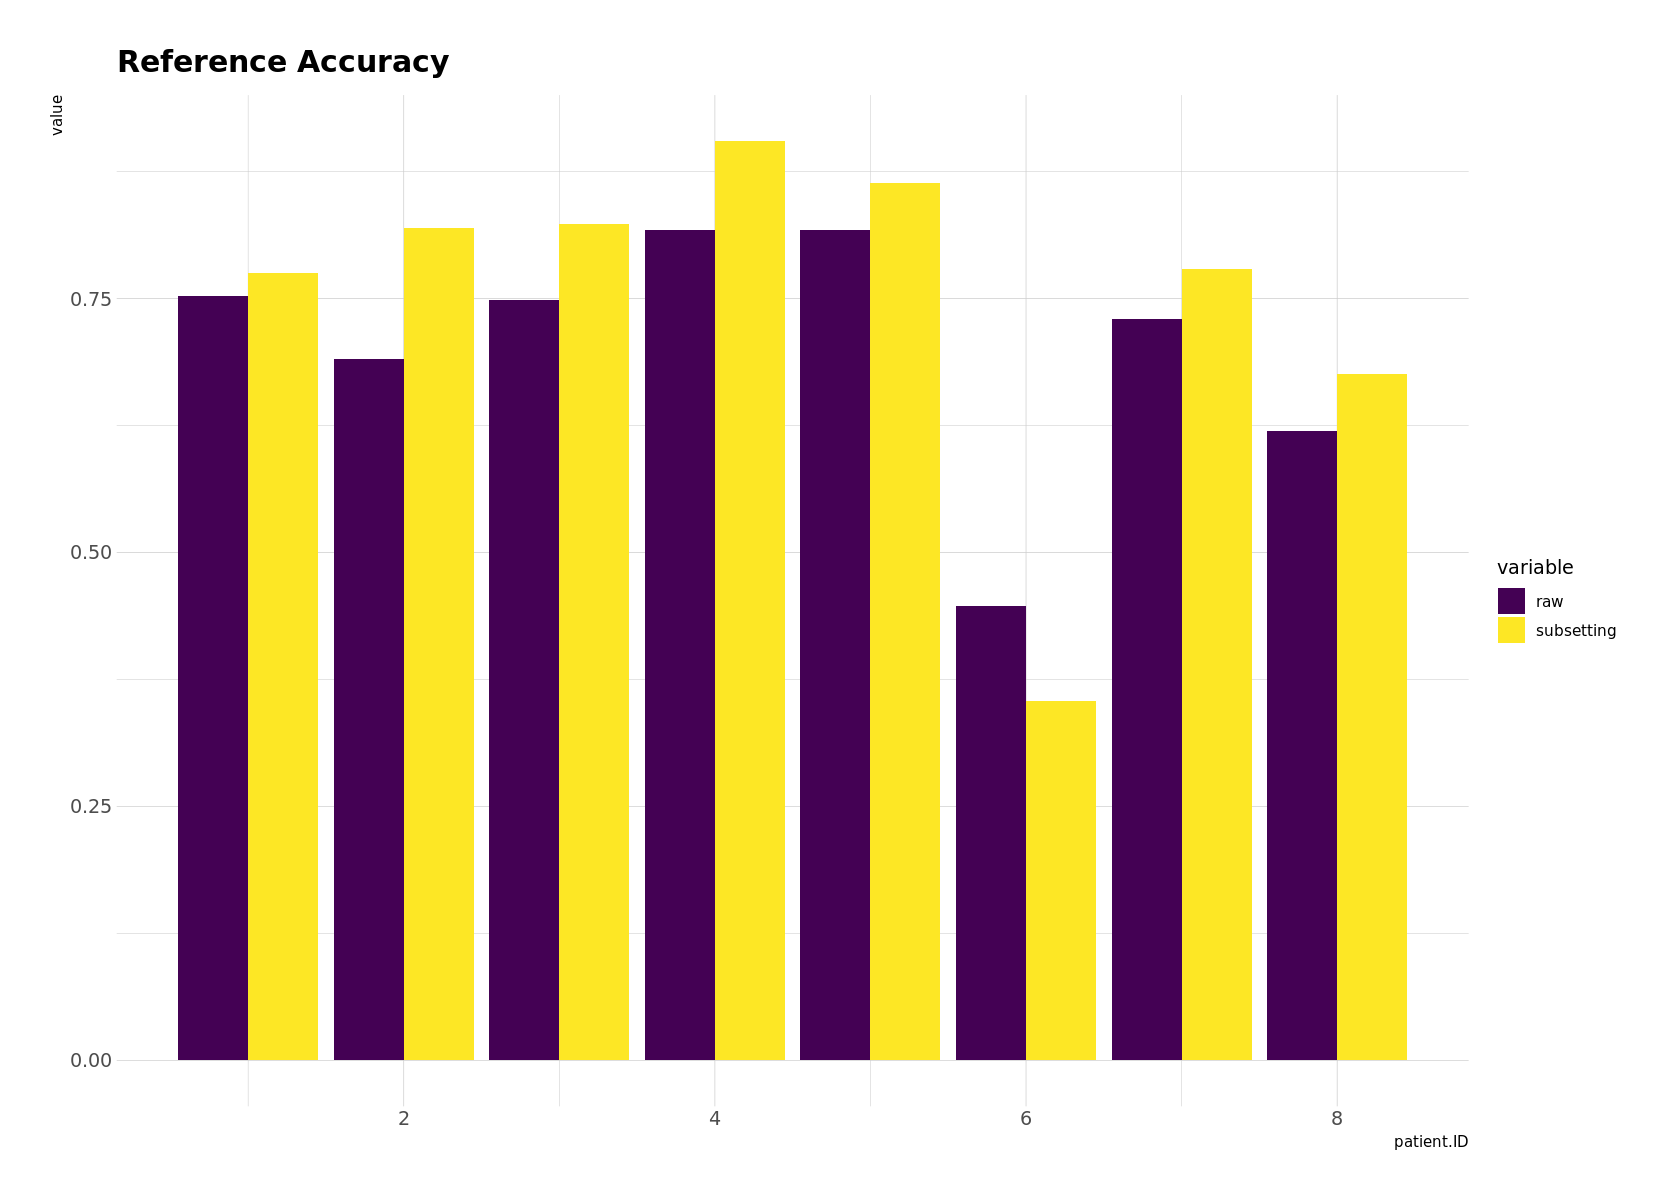

In [163]:
ggplot(acc_ref_long, aes(fill=variable, y=value, x=patient.ID)) + ggtitle("Reference Accuracy")+
    geom_bar(position="dodge", stat="identity") +theme_ipsum()+scale_fill_viridis(discrete = T)

In [159]:
acc_BCR <- data.frame(raw = acc_raw, subsetting=acc_subsetting)

Warning message in melt(acc_BCR):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(acc_BCR). In the next version, this warning will become an error.”
No id variables; using all as measure variables



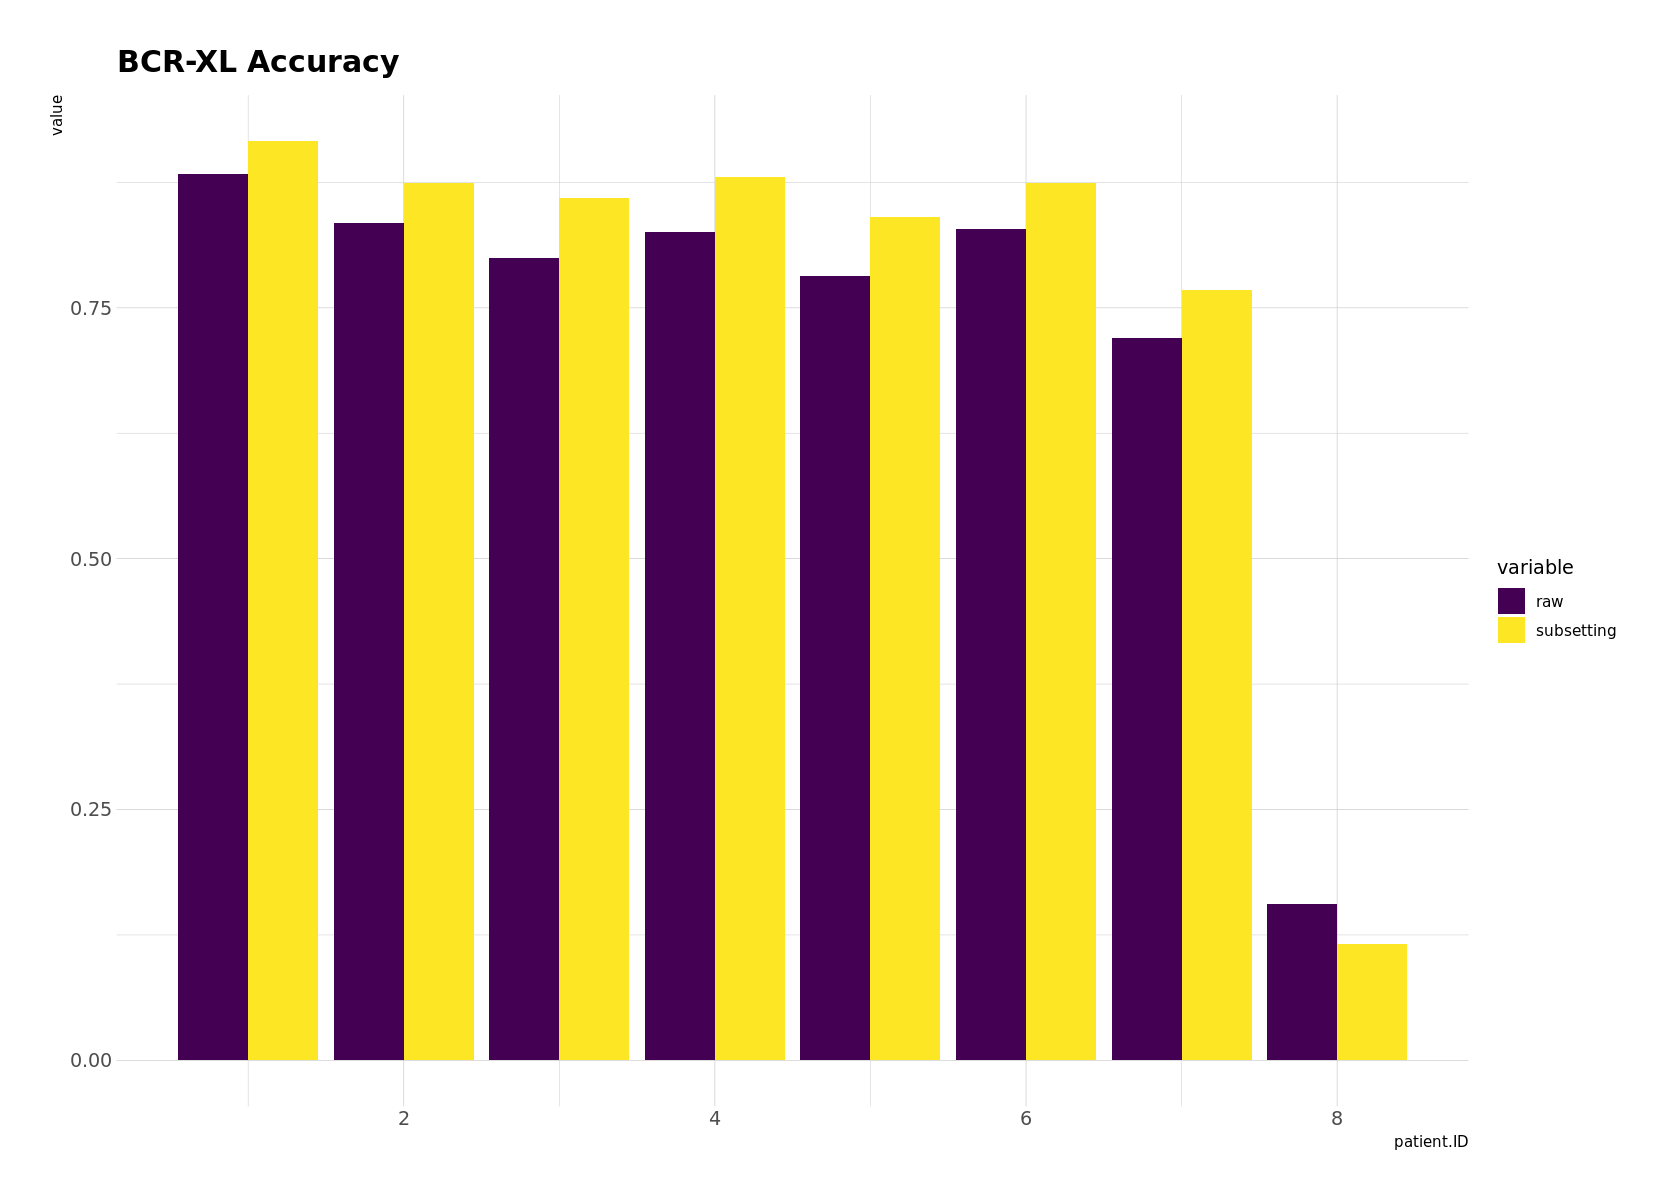

In [164]:
acc_BCR_long <- melt(acc_BCR)
acc_BCR_long$patient.ID <- c(c(1:8),c(1:8))
ggplot(acc_BCR_long, aes(fill=variable, y=value, x=patient.ID)) + ggtitle("BCR-XL Accuracy")+
    geom_bar(position="dodge", stat="identity") +theme_ipsum()+scale_fill_viridis(discrete = T)

In [202]:
ct_prop_pred_ref <- apply(ct_cnt_pred_ref,1,function(x) x/sum(x))
ct_prop_label_ref <- apply(ct_cnt_label_ref,1,function(x) x/sum(x))
                       
ct_prop_pred_ref <- data.frame(ct_prop_pred_ref)
ct_prop_label_ref <- data.frame(ct_prop_label_ref)
                       
ct_prop_pred_ref$celltype <- rownames(ct_prop_pred_ref)
ct_prop_pred_ref_long <-  melt(ct_prop_pred_ref, id.vars = 'celltype', variable.name = 'patient.ID') 
ct_prop_label_ref$celltype <- rownames(ct_prop_label_ref)
ct_prop_label_ref_long <-  melt(ct_prop_label_ref, id.vars = 'celltype', variable.name = 'patient.ID')  
                       
ct_prop_pred_ref_long$group = "prediction-Ref"
ct_prop_label_ref_long$group = "true-Ref"
ct_prop_ref_long <- rbind(ct_prop_pred_ref_long,ct_prop_label_ref_long)                       

Warning message in melt(ct_prop_pred_ref, id.vars = "celltype", variable.name = "patient.ID"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(ct_prop_pred_ref). In the next version, this warning will become an error.”
Warning message in melt(ct_prop_label_ref, id.vars = "celltype", variable.name = "patient.ID"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(ct_prop_label_ref

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”


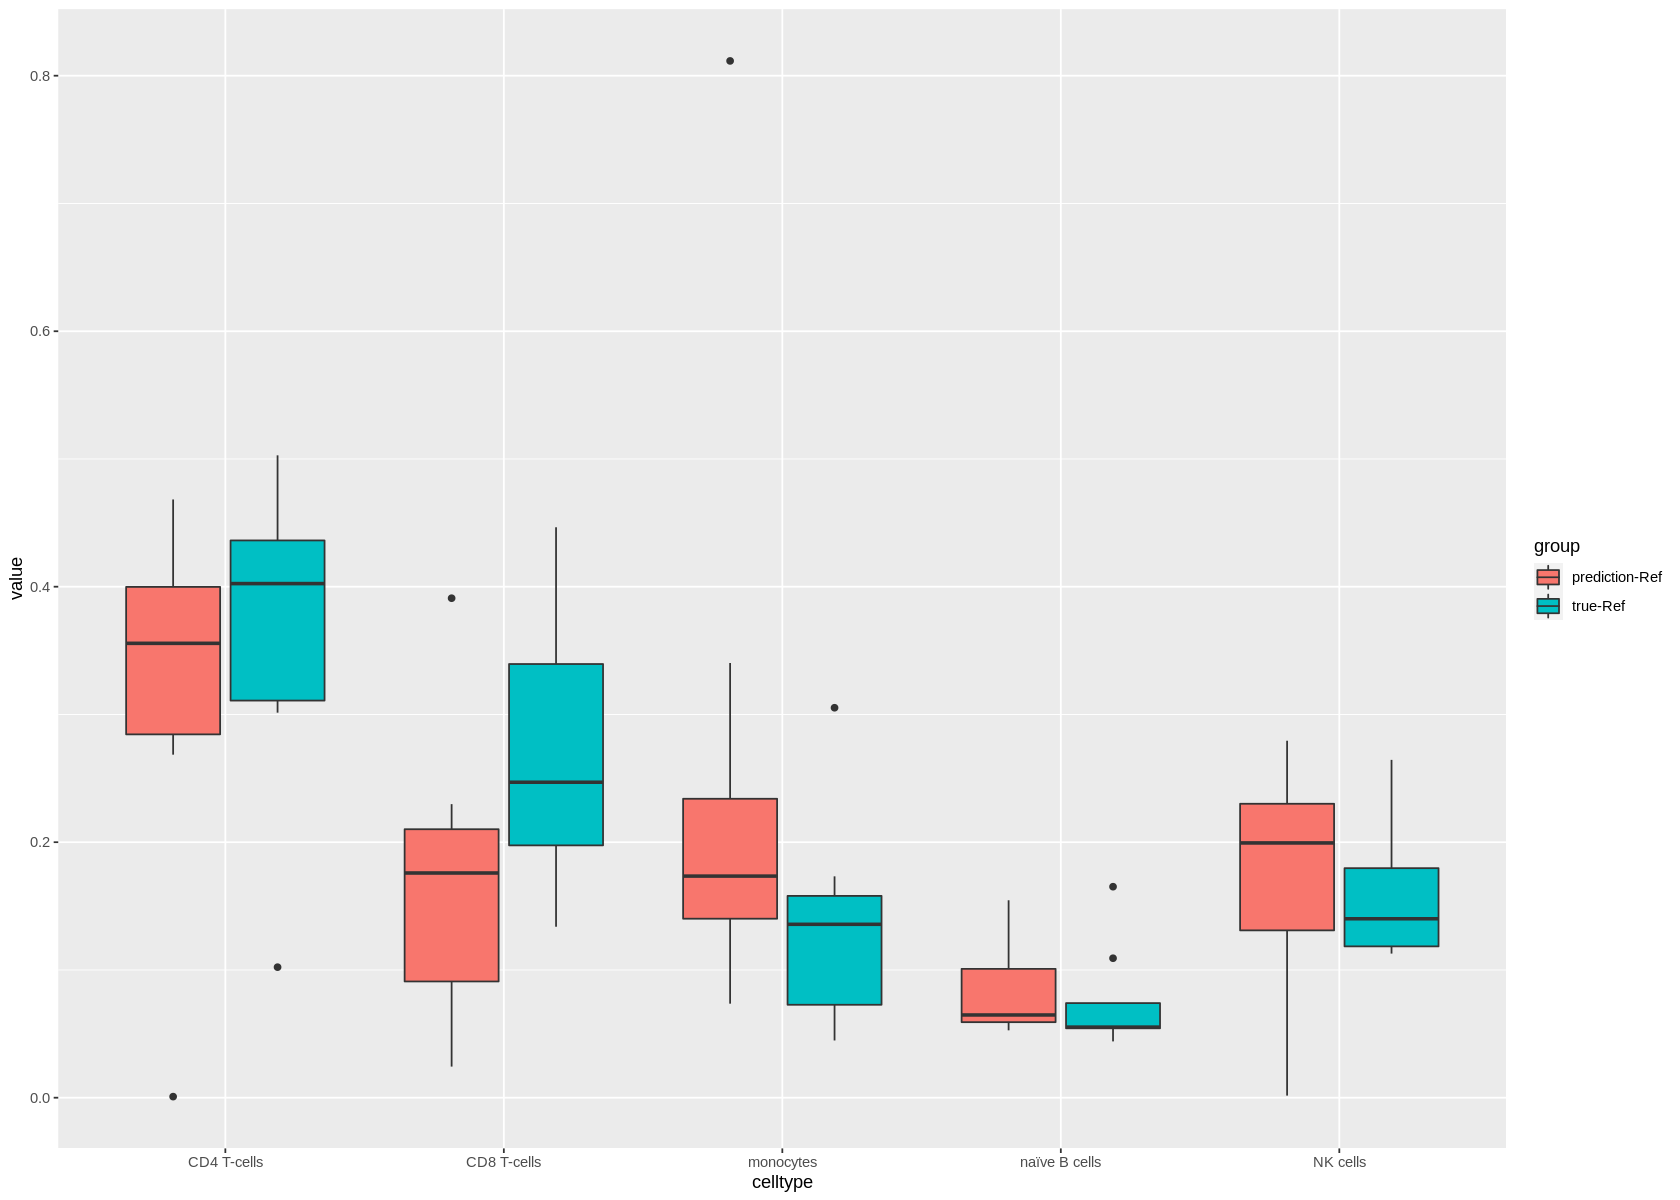

In [203]:
ggplot(ct_prop_ref_long, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”


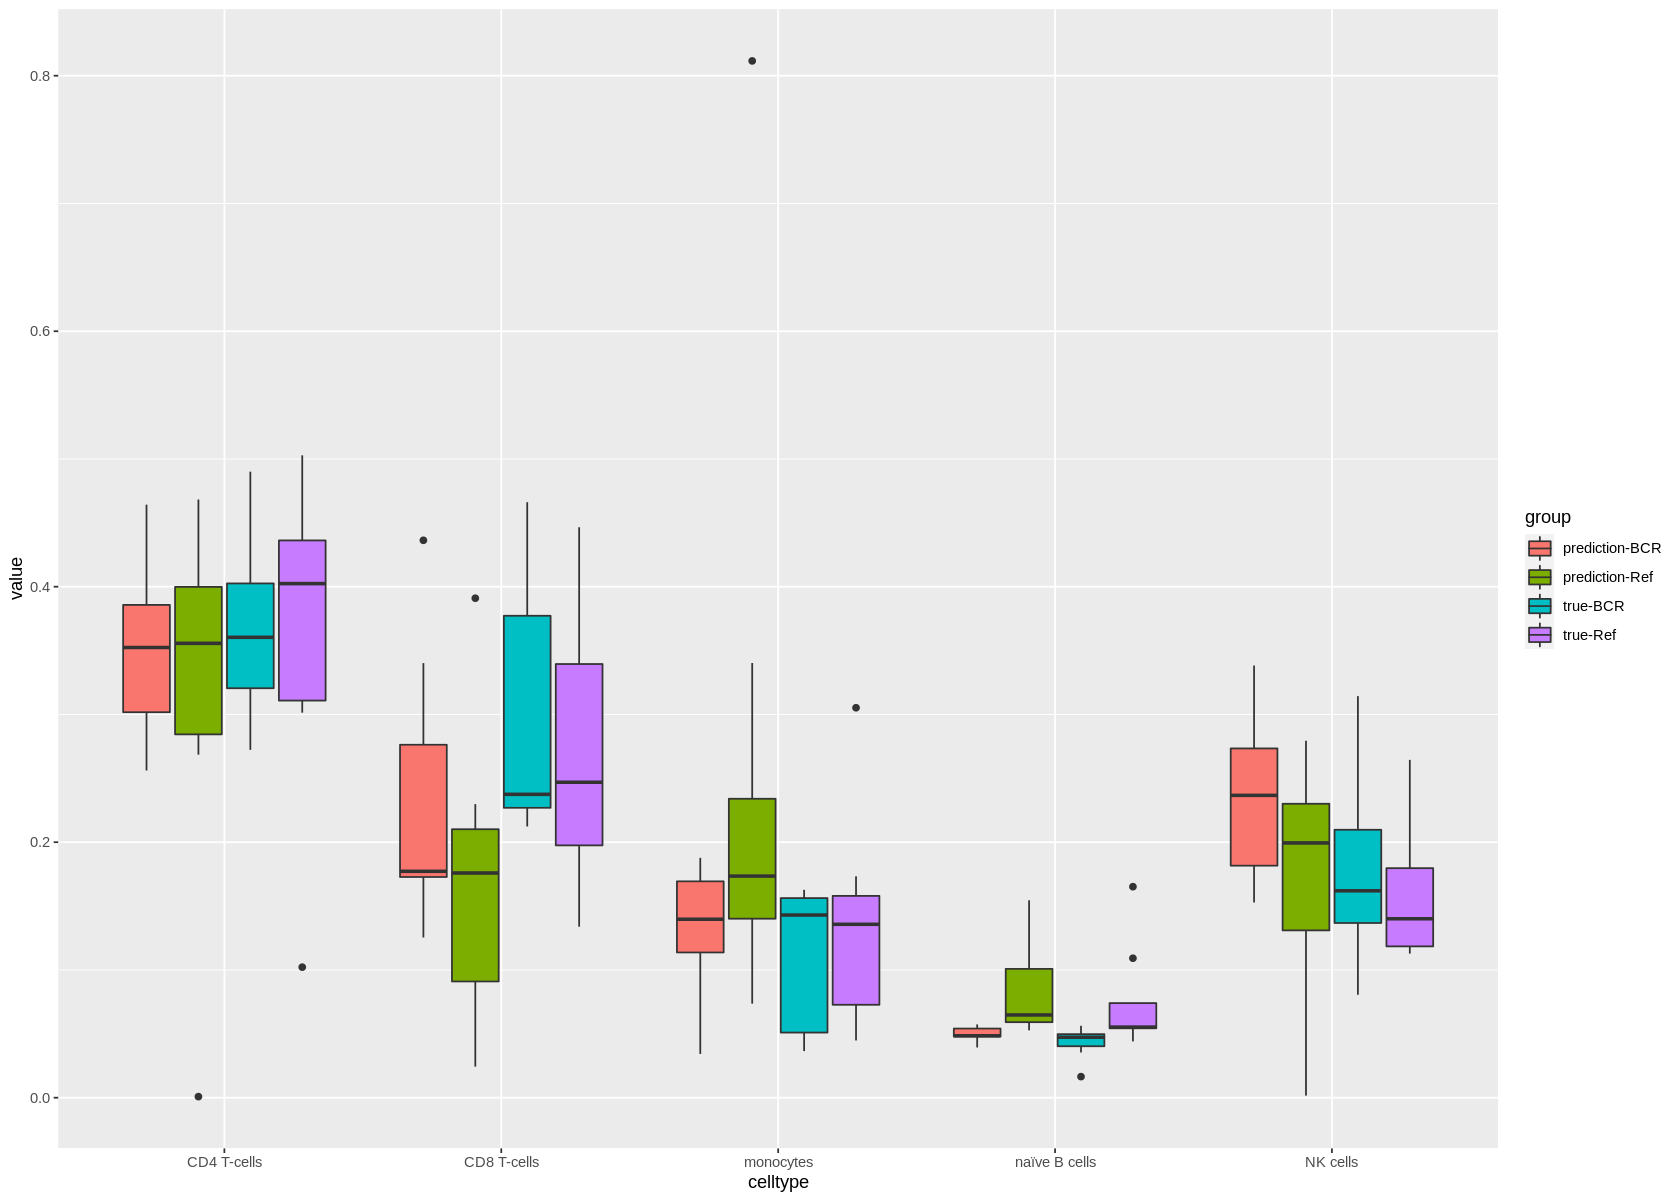

In [204]:
ct_prop_long_all <- rbind(ct_prop_long,ct_prop_ref_long)
ggplot(ct_prop_long_all, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()

In [206]:
suppressPackageStartupMessages(library(SummarizedExperiment))

In [207]:
BCR <- readRDS('/gpfs/loomis/project/zhao/bz234//Data/BCR/BCR_celltype_annotated.rds')
X <- assay(BCR[, colData(BCR)$marker_class == "type"])
X <- t(X)
cofactor <- 5
X <- asinh(X / cofactor)
colnames(X) <- c(1:ncol(X))
metadata.BCR<-rowData(BCR)
metadata.BCR <- data.frame(metadata.BCR@listData)
rownames(metadata.BCR) <- colnames(X)

In [212]:
A0 <- read.csv('./write/matrix_A0/A0_BCR.csv')
colnames(A0)[-c(1,2,6)]

[1] "naïve.B.cells" "CD4.T.cells"   "CD8.T.cells"   "monocytes"    
[5] "NK.cells"

In [228]:
CD3.df <- data.frame()
CD14.df <- data.frame()

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_BCR_files[sample.idx])
    seur <- readRDS(seur_BCR_files[sample.idx])
    truth <- seur$label

W <- rst$W
rownames(W) <- rownames(X)
colnames(W) <- colnames(A0)[-c(1,2,6)]

CD3.df <- rbind(CD3.df, data.frame( W['CD3',],  colnames(W)))
CD14.df <- rbind(CD14.df, data.frame(W['CD14',], colnames(W)))
    }


In [227]:
CD3_ref.df <- data.frame()
CD14_ref.df <- data.frame()

for(sample.idx in 1:length(rst_BCR_files)){
    rst <- readRDS(rst_Reference_files[sample.idx])
    seur <- readRDS(seur_Reference_files[sample.idx])
    truth <- seur$label

W <- rst$W
rownames(W) <- rownames(X)
colnames(W) <- colnames(A0)[-c(1,2,6)]

CD3_ref.df <- rbind(CD3_ref.df, data.frame( W['CD3',],  colnames(W)))
CD14_ref.df <- rbind(CD14_ref.df, data.frame(W['CD14',], colnames(W)))
    }

In [229]:
CD3.df$group <- "BCR"
CD14.df$group <- "BCR"
CD3_ref.df$group <- "Ref"
CD14_ref.df$group <- "Ref"
CD3.df <- rbind(CD3.df,CD3_ref.df)
CD14.df <- rbind(CD14.df,CD14_ref.df)

In [231]:
colnames(CD3.df) <- c("value","celltype","group")
colnames(CD14.df) <- c("value","celltype","group")

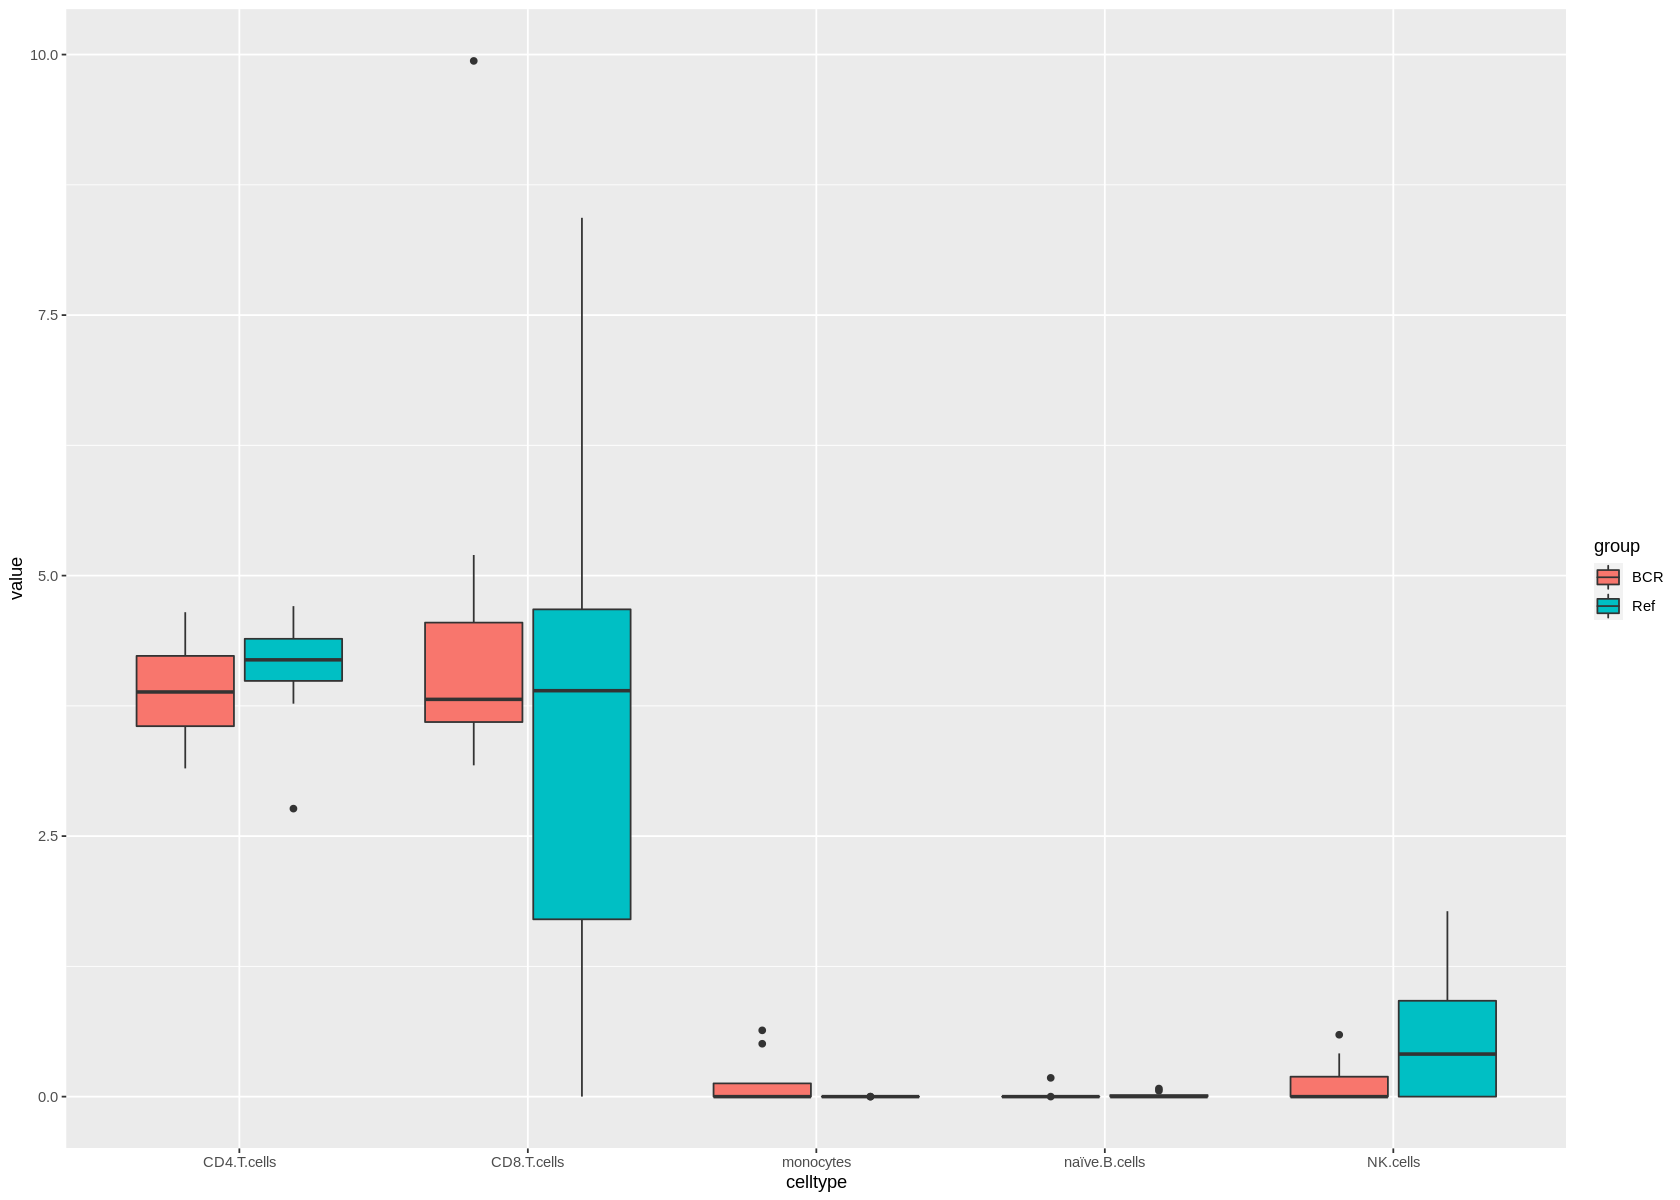

In [232]:
ggplot(CD3.df, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()

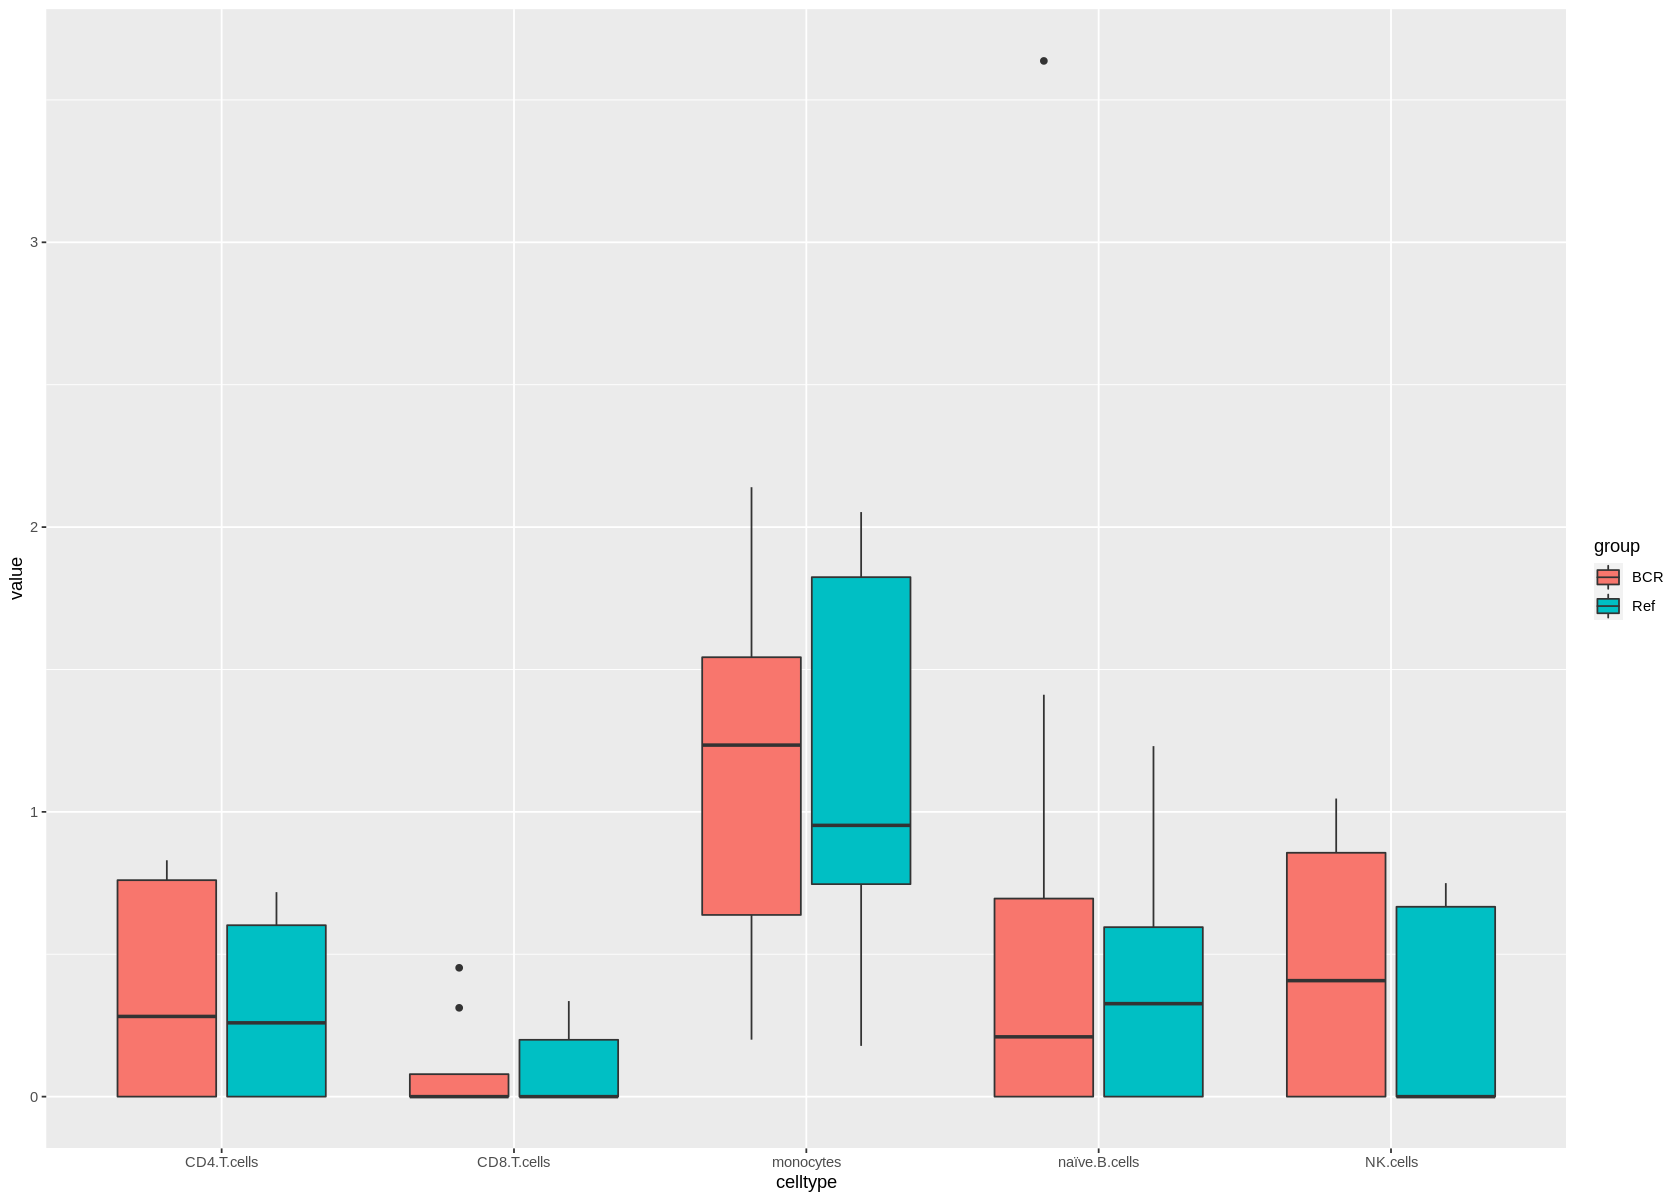

In [233]:
ggplot(CD14.df, aes(x=celltype, y=value,fill=group)) + 
    geom_boxplot()